# IRIS Flower Dataset

## Import basic libraries and read data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
data=pd.read_csv(r"IRIS.csv")
df=data.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Explore Data

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


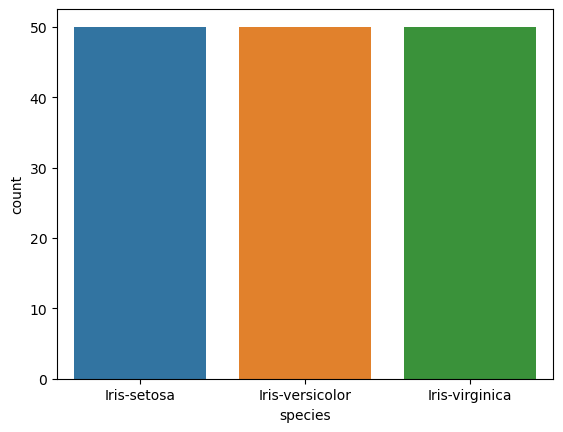

In [21]:
# target view
sns.countplot(x='species', data=df)
plt.show()

## Data precossing

### Split Data

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print (x.shape)
print (y.shape)

(150, 4)
(150,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### Data Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Model

### 1- SVC

In [27]:
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
81,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-versicolor
137,Iris-virginica,Iris-virginica
75,Iris-versicolor,Iris-versicolor
109,Iris-virginica,Iris-virginica


In [28]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


In [31]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9619
Testing Accuracy: 1.0000


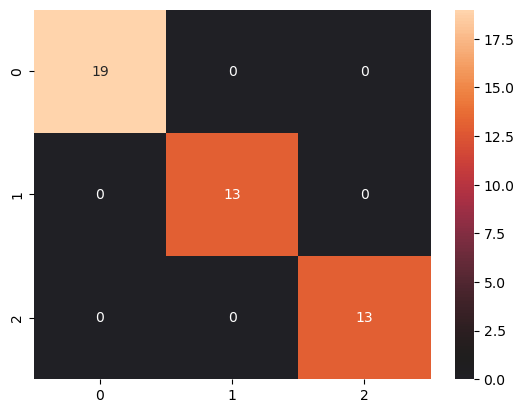

In [32]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 2- Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
81,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica
137,Iris-virginica,Iris-virginica
75,Iris-versicolor,Iris-versicolor
109,Iris-virginica,Iris-virginica


In [34]:
# predict_outcomes
test_pred = model.predict(x_test)
predication=pd.DataFrame({'actual':y_test,'predicat':test_pred})
predication.head()

,actual,predicat
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


In [35]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


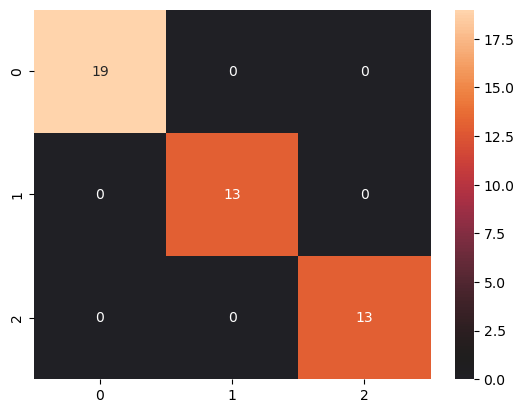

In [36]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

### 3- Random Forset

In [39]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=2)
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
predication=pd.DataFrame({'actual':y_train,'predicat':train_pred})
predication.head()

,actual,predicat
81,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica
137,Iris-virginica,Iris-virginica
75,Iris-versicolor,Iris-versicolor
109,Iris-virginica,Iris-virginica


In [40]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9810
Testing Accuracy: 1.0000


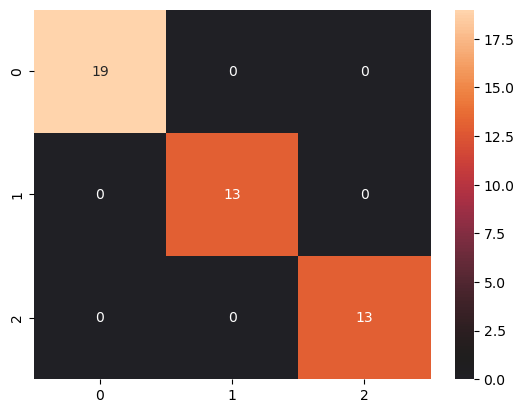

In [41]:
cm=confusion_matrix(y_test,test_pred)
sns.heatmap(cm,center=True,annot=True)
plt.show()

# Conclusion

__I found all model acts good because data is desinged for model predication and small__